In [1]:
import * as _ from "npm:lodash-es"
import { DOMParser, SVGElement } from "npm:linkedom";
import { display } from "../mod.ts";

const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);

In [2]:
import { parse, stringify } from "https://deno.land/std@0.194.0/csv/mod.ts";

import * as d3 from "npm:d3"

let text = await Deno.readTextFile("./us-congress-2023.csv");

let congress = d3.csvParse(text);

congress.forEach((entry: any) => {
  entry.birthday = new Date(entry.birthday);
});

_.sample(congress)

{
  full_name: "Valerie P. Foushee",
  birthday: 1956-05-07T00:00:00.000Z,
  gender: "F",
  type: "rep",
  state: "NC",
  party: "Democrat"
}

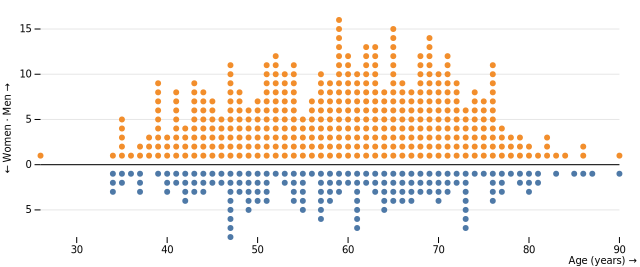

In [4]:
import * as Plot from "npm:@observablehq/plot";

await display(Plot.plot({
  aspectRatio: 1,
  x: {label: "Age (years)"},
  y: {
    grid: true,
    label: "← Women · Men →",
    labelAnchor: "center",
    tickFormat: Math.abs
  },
  marks: [
    Plot.dot(
      congress,
      Plot.stackY2({
        x: (d) => 2023 - d.birthday.getUTCFullYear(),
        y: (d) => d.gender === "M" ? 1 : -1,
        fill: "gender",
        title: "full_name"
      })
    ),
    Plot.ruleY([0])
  ],
  document
}))